<a href="https://colab.research.google.com/github/kimmjen/Colab/blob/master/another_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 

train_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/IBK_train.csv") 
test_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/IBK_test.csv")


In [2]:
train_data['content']

0        [머니투데이 창조기획팀 이동오 기자] [글로벌 여행 액티비티 예약 플랫폼 와그(WA...
1        IBK기업은행은 인도 뉴델리 소재 IIT(Indian Institute of Tec...
2        [머니투데이 박광범 기자] 최성재 IBK기업으행 글로벌사업부 본부장(왼쪽)과 산지브...
3        [머니투데이 양태연 머니투데이방송 PD] \n\n\n\n<시장을 이겨라>\n\n이슈...
4        안정적인 채권 이자수익과 더불어 페어트레이딩 전략으로 초과수익을 추구하는 미래에셋스...
                               ...                        
11995    제6구단이 탄생할까, 아니면 4개 팀으로 축소될까.\n배구계가 뒤숭숭하다. 2009...
11996    한국투자증권의 ‘한국투자한국의힘증권1’ 펀드는 세계 경쟁력을 갖춘 한국의 대표 기업...
11997    세계경제의 빠른 회복세 속에 정보통신(IT) 산업이 호황을 기록하면서 국내 기업들 ...
11998    세계경제의 빠른 회복세 속에 정보통신(IT) 산업이 호황을 기록하면서 국내 기업들 ...
11999    “승용차 요일제에 참여하면 이자를 더 드려요.” \n환경친화적인 기업이나 개인 고객...
Name: content, Length: 12000, dtype: object

In [3]:
test_data['기사내용']

0       [머니투데이 박광범 기자] [[미래를 바꾸는 혁신금융]'IBK형 기술금융' 추진…신...
1       IBK기업은행은 개인사업자가 대출을 연장할 때 모바일·인터넷뱅킹으로 기간연장 약정서...
2       [아시아경제 박지환 기자] IBK기업은행은 개인사업자가 대출 연장 때 모바일·인터넷...
3       [ 차은지 기자  ] (사진=IBK기업은행)IBK기업은행은 'IBK 스마트 여신약정...
4       [ 정현영 기자  ] IBK기업은행(은행장 김도진)은 개인사업자가 대출을 연장할 때...
                              ...                        
1520    [헤럴드경제=이승환 기자] IBK기업은행이 28일로 예정됐던 이사회를 다음달 11일...
1521    위기 속 빛나는 사회공헌기업은행은 신종 코로나바이러스 감염증(코로나19)으로 피해를...
1522    ◆ 차트 분석- 단기·중기 이평선 정배열로 상승세추세선으로 보면 현재 단기·중기 이...
1523    IBK기업은행은 지문, 홍채 등의 생체인증에서 한단계 발전된 음성본인확인(Voice...
1524    ◆ 디지털금융 ◆ IBK기업은행은 지난해 창립 58주년을 맞아 중소기업 경영지원 디...
Name: 기사내용, Length: 1525, dtype: object

In [5]:
pip install konlpy

     |████████████████████████████████| 19.4MB 55.0MB/s 
     |████████████████████████████████| 92kB 10.2MB/s 
     |████████████████████████████████| 3.6MB 42.8MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


In [0]:
# 타이틀을 이용함
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

import konlpy 
from konlpy.tag import Okt 
okt = Okt() 

X_train = [] 
for sentence in train_data['headline']: 
  temp_X = [] 
  temp_X = okt.morphs(sentence, stem=True) # 토큰화 
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거 
  X_train.append(temp_X) 
  
X_test = [] 
for sentence in test_data['기사제목']: 
  temp_X = [] 
  temp_X = okt.morphs(sentence, stem=True) # 토큰화 
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거 
  X_test.append(temp_X)


In [0]:
import re, os, sys

In [0]:
# 불용어처리 - title
no_meaning = "머니투데이|조선일보|동아일보|중앙일보|한겨레|문화일보|아시아투데이|연합뉴스|서울경제"
no_meaning += "|국민일보|세계일보|내일신문|문화일보|경향신문|한국일보|서울신문|세계일보"
no_meaning += "|매일경제신문|한국경제신문|서울경제신문|헤럴드경제|아시아경제|파이낸셜뉴스|머니투데이|데일리경제|아주경제"
no_meaning += "|기자|PD|내일신문|인사이드|@naver.com|@daum.net|@hanmail.net|@gmail.com|@yna.co.kr|@wowtv.co.kr|@edaily.co.kr"
no_meaning += "|@seoul.co.kr|@mkinternet.com|@chosun.com|@wowtv.co.kr|@hankyung.com|@mt.co.kr"
no_meaning += "|IBK|기업은행|ibk|중소기업은행|IBK기업은행|IBK중소기업은행|㈜|…"
train_data_clean = []
for a_line in train_data['headline']:
    a_line = re.sub('\d+',' ', a_line)           # 수치 스페이스로 대체.
    a_line = re.sub('[-!?()>~.,▶◆ㆍ#▲△@⊙■※★%中小企業者: /◇<·”‘“’''"]',' ',a_line)    # 특수문자 스페이스로 대체.
    a_line = re.sub('\n',' ',a_line)             # line return 스페이스로 대체.
    a_line = re.sub('[\[\]]', ' ',a_line)        # 대괄호 스페이스로 대체.
    a_line = re.sub('ㅜ|ㅠ', ' ', a_line)        # 단모음 스페이스로 대체.
    a_line = re.sub(no_meaning, ' ', a_line)     # 특별한 의미 없는 단어 스페이스로 대체.
    a_line = re.sub('\s+', ' ', a_line)          # 잉여 스페이즈 줄임.
    train_data_clean += [a_line]

In [0]:
# 불용어처리 - 기사제목
no_meaning = "머니투데이|조선일보|동아일보|중앙일보|한겨레|문화일보|아시아투데이|연합뉴스|서울경제"
no_meaning += "|국민일보|세계일보|내일신문|문화일보|경향신문|한국일보|서울신문|세계일보"
no_meaning += "|매일경제신문|한국경제신문|서울경제신문|헤럴드경제|아시아경제|파이낸셜뉴스|머니투데이|데일리경제|아주경제"
no_meaning += "|기자|PD|내일신문|인사이드|@naver.com|@daum.net|@hanmail.net|@gmail.com|@yna.co.kr|@wowtv.co.kr|@edaily.co.kr"
no_meaning += "|@seoul.co.kr|@mkinternet.com|@chosun.com|@wowtv.co.kr|@hankyung.com|@mt.co.kr"
no_meaning += "|IBK|기업은행|ibk|중소기업은행|IBK기업은행|IBK중소기업은행|㈜|…"
test_data_clean = []
for a_line in test_data['기사제목']:
    a_line = re.sub('\d+',' ', a_line)           # 수치 스페이스로 대체.
    a_line = re.sub('[-!?()>~.,▶◆ㆍ#▲△@⊙■※★%中小企業者: /◇<·”‘“’''"]',' ',a_line)    # 특수문자 스페이스로 대체.
    a_line = re.sub('\n',' ',a_line)             # line return 스페이스로 대체.
    a_line = re.sub('[\[\]]', ' ',a_line)        # 대괄호 스페이스로 대체.
    a_line = re.sub('ㅜ|ㅠ', ' ', a_line)        # 단모음 스페이스로 대체.
    a_line = re.sub(no_meaning, ' ', a_line)     # 특별한 의미 없는 단어 스페이스로 대체.
    a_line = re.sub('\s+', ' ', a_line)          # 잉여 스페이즈 줄임.
    test_data_clean += [a_line]

In [0]:
train_data_clean

In [0]:
test_data_clean

In [0]:
# 불용어처리 - content
no_meaning = "머니투데이|조선일보|동아일보|중앙일보|한겨레|문화일보|아시아투데이|연합뉴스|서울경제"
no_meaning += "|국민일보|세계일보|내일신문|문화일보|경향신문|한국일보|서울신문|세계일보"
no_meaning += "|매일경제신문|한국경제신문|서울경제신문|헤럴드경제|아시아경제|파이낸셜뉴스|머니투데이|데일리경제|아주경제"
no_meaning += "|기자|PD|내일신문|인사이드|@naver.com|@daum.net|@hanmail.net|@gmail.com|@yna.co.kr|@wowtv.co.kr|@edaily.co.kr"
no_meaning += "|@seoul.co.kr|@mkinternet.com|@chosun.com|@wowtv.co.kr|@hankyung.com|@mt.co.kr"
no_meaning += "|IBK|기업은행|ibk|중소기업은행|IBK기업은행|IBK중소기업은행|㈜|…"
train_data2_clean = []
for a_line in train_data['content']:
    a_line = re.sub('\d+',' ', a_line)           # 수치 스페이스로 대체.
    a_line = re.sub('[-!?()>~.,▶▷◆◀ㆍ#▲△@⊙●■※★%中小企業者: /◇=<·”‘“’''"]',' ',a_line)    # 특수문자 스페이스로 대체.
    a_line = re.sub('[①②ⓒ]',' ',a_line)
    a_line = re.sub('\n',' ',a_line)             # line return 스페이스로 대체.
    a_line = re.sub('[\[\]]', ' ',a_line)        # 대괄호 스페이스로 대체.
    a_line = re.sub('ㅜ|ㅠ', ' ', a_line)        # 단모음 스페이스로 대체.
    a_line = re.sub(no_meaning, ' ', a_line)     # 특별한 의미 없는 단어 스페이스로 대체.
    a_line = re.sub('\s+', ' ', a_line)          # 잉여 스페이즈 줄임.
    train_data2_clean += [a_line]

In [0]:
# 불용어처리 - 기사내용
no_meaning = "머니투데이|조선일보|동아일보|중앙일보|한겨레|문화일보|아시아투데이|연합뉴스|서울경제"
no_meaning += "|국민일보|세계일보|내일신문|문화일보|경향신문|한국일보|서울신문|세계일보"
no_meaning += "|매일경제신문|한국경제신문|서울경제신문|헤럴드경제|아시아경제|파이낸셜뉴스|머니투데이|데일리경제|아주경제"
no_meaning += "|기자|PD|내일신문|인사이드|@naver.com|@daum.net|@hanmail.net|@gmail.com|@yna.co.kr|@wowtv.co.kr|@edaily.co.kr"
no_meaning += "|@seoul.co.kr|@mkinternet.com|@chosun.com|@wowtv.co.kr|@hankyung.com|@mt.co.kr"
no_meaning += "|IBK|기업은행|ibk|중소기업은행|IBK기업은행|IBK중소기업은행|㈜|…"
test_data2_clean = []
for a_line in test_data['기사내용']:
    a_line = re.sub('\d+',' ', a_line)           # 수치 스페이스로 대체.
    a_line = re.sub('[-!?()>~.,▶▷◆◀ㆍ#▲△@⊙●■※★%中小企業者: /◇=<·”‘“’''"]',' ',a_line)    # 특수문자 스페이스로 대체.
    a_line = re.sub('[①②ⓒ]',' ',a_line)
    a_line = re.sub('\n',' ',a_line)             # line return 스페이스로 대체.
    a_line = re.sub('[\[\]]', ' ',a_line)        # 대괄호 스페이스로 대체.
    a_line = re.sub('ㅜ|ㅠ', ' ', a_line)        # 단모음 스페이스로 대체.
    a_line = re.sub(no_meaning, ' ', a_line)     # 특별한 의미 없는 단어 스페이스로 대체.
    a_line = re.sub('\s+', ' ', a_line)          # 잉여 스페이즈 줄임.
    test_data2_clean += [a_line]

In [31]:
train_data2_clean

[' 창조기획팀 이동오 글로벌 여행 액티비티 예약 플랫폼 와그 WAUG 시리즈C 투자 유치 글로벌 여행 액티비티 예약 플랫폼 와그 WAUG 를 서비스하는 와그트래블 대표 선우윤 이 시리즈C 투자를 유치했다고 일 밝혔다 사진제공 와그트래블이번 투자는 기존 투자사인 LB인베스트먼트 컴퍼니K파트너스를 비롯해 신규 주주로 SBI인베스트먼트 알바트로스인베스트먼트 로그인베스트먼트 델타인베스트먼트 그리고 이 참여했다 투자 금액은 억원이다 여기에 신용보증기금의 퍼스트펭귄기업 선정으로 억원을 추가 확보했다 업체 측은 년 와그 서비스 출시 후 누적 투자액은 억원으로 국내 단일 액티비티 예약 플랫폼으로는 최대 규모 라고 설명했다 와그는 현재 여 개 도시 만여 개의 여행 액티비티 상품을 판매 중이다 년 서비스 출시 후 연평균 의 매출 성장을 이뤄냈으며 모바일 결제 비율이 로 모바일에 가장 최적화된 자유여행 서비스로 평가받고 있다 올해 월에는 본격적으로 해외 시장에 진출했다 매월 건 이상의 해외 사용자의 결제가 이뤄지고 있으며 이상이 싱가포르 필리핀 등 동남아시아 사용자다 와그는 경쟁이 치열한 국내 여행 액티비티 시장에 안주하지 않고 글로벌 시장을 개척해 규모와 성장세를 더욱 가속한다는 계획이다 이미 싱가포르 법인과 일본 지사를 설립했으며 연내 홍콩 태국 필리핀 등 동남아시아 주요 국가에 진출할 계획이다 또한 현지에 전문 인력을 채용해 현지 제휴와 마케팅을 강화할 예정이다 자체 브랜드 PB 투어인 와그 핑크 시리즈도 강화한다 현재 개 국가에서 운영되고 있는 와그 핑크 시리즈는 괌 와그 핑크 돌핀크루즈 방콕 와그 핑크 왕궁 투어 등 총 개가 있는데 올해 개까지 늘릴 계획이다 이번 투자를 주도한 SBI인베스트먼트의 황규진 팀장은 와그는 이미 높은 상품 콘텐츠 퀄리티와 판매량을 기반으로 경쟁사 대비 안정적인 수익성을 갖고 있는 서비스 라며 강력한 한국 아웃바운드 시장을 기반으로 일본 및 동남아에 성공적으로 안착해 아시아 대표 액티비티 플랫폼으로 자리잡을 것으로 기대한다 고 말했다 선우윤 

In [32]:
test_data2_clean

[" 박광범 미래를 바꾸는 혁신금융 ' 형 기술금융' 추진 신성장‧혁신 분야에 년간 억 투자 김도진 장 사진 은 ' 형 기술금융'을 전면에 내세우고 담보대출 중심의 금융 관행 혁신에 앞장서고 있다 형 기술금융은 기술우수기업을 직접 발굴해 매출이나 손익 실적 대신 미래성장성과 기술력 중심으로 기업을 평가하고 부동산 담보대출 대신 신용대출 투자 중심으로 지원하는 게 핵심이다 형 기술금융 실현을 위해 은 ' 테크기업' 제도를 신설해 미래성장성이 높고 기술력이 우수한 혁신 창업기업을 직접 발굴하고 있다 기술평가를 담당하는 전문성 높은 석 박사급 인력이 과거 재무실적 대신 순수 기술력만으로 기업을 평가한 후 심의를 거쳐 연간 여개의 기업을 선정한다 은 선정 기업에 대출 뿐 아니라 기술개발 특허출원 기술이전과 관련한 맞춤형 컨설팅도 제공해 해당 기업이 유니콘 기업 기업 가치 조원 이상 비상장기업 으로 성장할 때까지 든든한 동반자가 된다는 계획이다 이를 위해 영업점 경영평가 제도를 신용대출 투자 중심으로 개편하고 기술우수기업에 대한 금리감면권을 확대했다 영업 현장의 적극적 자금 지원을 유도하고 거래 중소기업의 금융비용을 절감하기 위해서다 기술우수기업의 경우 기술력을 신용평가에 반영해 신용등급을 상향 대출 한도와 금리를 우대하는 제도도 시범 운용 중이다 중장기적으로는 기술평가와 신용평가를 일원화화는 '통합여신심사모형' 개발을 단계적으로 추진한다 은 또 신성장‧혁신 분야에 대한 자금공급을 확대하기 위해 년까지 년 간 억원의 신규 직접투자를 진행한다 투자는 ' 창업‧벤처 투자 시스템'을 통해 이뤄진다 관계자는 창업 초기기업에 대한 투자는 다수 소액 투자에 따른 관리비용 회수기간의 장기화 등의 이유로 벤처캐피탈도 기피해 온 분야 라며 투자 기업의 성공사례를 만들고 투자이익을 유망한 창업‧벤처기업에 재투자해 창업‧벤처 생태계 조성에 기여할 것 이라고 말했다 박광범 socool mt co kr 이코노미스트들의 투자칼럼 조 변호사의 가정상담소 더 많은 기사 보러가기 저작권자 '돈이 보

In [0]:
#
train_data['clean_healine'] = train_data_clean
#
train_data['clean_content'] = train_data2_clean

In [34]:
train_data

Unnamed: 0  ...                                      clean_content
0               0  ...   창조기획팀 이동오 글로벌 여행 액티비티 예약 플랫폼 와그 WAUG 시리즈C 투자 ...
1               1  ...   은 인도 뉴델리 소재 IIT Indian Institute of Technolog...
2               2  ...   박광범 최성재 기업으행 글로벌사업부 본부장 왼쪽 과 산지브 상히 IIT 경영전문대...
3               3  ...   양태연 방송 시장을 이겨라 이슈를 꿰뚫어 보는 눈 시장을 이길 특별한 시선이 필요...
4               4  ...  안정적인 채권 이자수익과 더불어 페어트레이딩 전략으로 초과수익을 추구하는 미래에셋스...
...           ...  ...                                                ...
11995       11995  ...  제 구단이 탄생할까 아니면 개 팀으로 축소될까 배구계가 뒤숭숭하다 V리그가 막을 내...
11996       11996  ...  한국투자증권의 한국투자한국의힘증권 펀드는 세계 경쟁력을 갖춘 한국의 대표 기업에 집...
11997       11997  ...  세계경제의 빠른 회복세 속에 정보통신 IT 산업이 호황을 기록하면서 국내 기업들 실...
11998       11998  ...  세계경제의 빠른 회복세 속에 정보통신 IT 산업이 호황을 기록하면서 국내 기업들 실...
11999       11999  ...   승용차 요일제에 참여하면 이자를 더 드려요 환경친화적인 기업이나 개인 고객에게 금...

[12000 rows x 7 columns]

In [0]:
#
test_data['기사제목_클린'] = test_data_clean
#
test_data['기사내용_클린'] = test_data2_clean

In [42]:
test_data

Unnamed: 0  ...                                            기사내용_클린
0              0  ...   박광범 미래를 바꾸는 혁신금융 ' 형 기술금융' 추진 신성장‧혁신 분야에 년간 억...
1              1  ...   은 개인사업자가 대출을 연장할 때 모바일 인터넷뱅킹으로 기간연장 약정서를 작성할 ...
2              2  ...   박지환 은 개인사업자가 대출 연장 때 모바일 인터넷뱅킹으로 기간연장 약정서를 작성...
3              3  ...   차은지 사진 은 ' 스마트 여신약정 서비스'를 시행한다고 일 밝혔다 이 서비스와 ...
4              4  ...   정현영 은행장 김도진 은 개인사업자가 대출을 연장할 때 모바일 인터넷뱅킹으로 기간...
...          ...  ...                                                ...
1520        1520  ...   이승환 이 일로 예정됐던 이사회를 다음달 일로 연기했다 측은 일부 안건에 대한 대...
1521        1521  ...  위기 속 빛나는 사회공헌 은 신종 코로나바이러스 감염증 코로나 으로 피해를 보고 있...
1522        1522  ...   차트 분석 단기 중기 이평선 정배열로 상승세추세선으로 보면 현재 단기 중기 이평선...
1523        1523  ...   은 지문 홍채 등의 생체인증에서 한단계 발전된 음성본인확인 Voice ID 서비스...
1524        1524  ...   디지털금융 은 지난해 창립 주년을 맞아 중소기업 경영지원 디지털 플랫폼 `BOX`...

[1525 rows x 7 columns]

In [0]:
data_clean = pd.DataFrame(train_data)
data_clean.to_csv('/content/drive/My Drive/Colab Notebooks/data/IBK_train_clean.csv', encoding='utf-8')

In [0]:
data_clean = pd.DataFrame(test_data)
data_clean.to_csv('/content/drive/My Drive/Colab Notebooks/data/IBK_test_clean.csv', encoding='utf-8')

In [0]:
# 내용을 이용함
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

import konlpy 
from konlpy.tag import Okt 
okt = Okt() 

X_train2 = [] 
for sentence in train_data['content']: 
  temp_X = [] 
  temp_X = okt.morphs(sentence, stem=True) # 토큰화 
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거 
  X_train.append(temp_X) 
  
X_test2 = [] 
for sentence in test_data['기사내용']: 
  temp_X = [] 
  temp_X = okt.morphs(sentence, stem=True) # 토큰화 
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거 
  X_test.append(temp_X)


In [10]:
X_train2

[]

In [11]:
X_test2

[]

In [14]:
from keras.preprocessing.text import Tokenizer 

max_words = 5000 
# max_words = 35000 
tokenizer = Tokenizer(num_words = max_words) 
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train) 
X_test = tokenizer.texts_to_sequences(X_test)


Using TensorFlow backend.


In [0]:
%matplotlib inline 
import matplotlib.pyplot as plt


In [17]:
print("제목의 최대 길이 : ", max(len(l) for l in X_train)) 
print("제목의 평균 길이 : ", sum(map(len, X_train))/ len(X_train)) 
plt.hist([len(s) for s in X_train], bins=50) 
plt.xlabel('length of Data') 
plt.ylabel('number of Data') 
plt.show()


제목의 최대 길이 :  5091
제목의 평균 길이 :  189.41320833333333


In [0]:
from keras.preprocessing.text import Tokenizer 

max_words = 5000 
# max_words = 35000 
tokenizer = Tokenizer(num_words = max_words) 
tokenizer.fit_on_texts(X_train2)

X_train2 = tokenizer.texts_to_sequences(X_train2) 
X_test2 = tokenizer.texts_to_sequences(X_test2)


In [0]:
print("제목의 최대 길이 : ", max(len(l) for l in X_test2)) 
print("제목의 평균 길이 : ", sum(map(len, X_test))/ len(X_test2)) 
plt.hist([len(s) for s in X_test2], bins=50) 
plt.xlabel('length of Data') 
plt.ylabel('number of Data') 
plt.show()


In [0]:
ls


2. 데이터 분석해보기

만들어진 csv파일을 google drive에 업로드하고 google colab에서 google drive를 마운트한 뒤 진행했습니다.


In [0]:
import pandas as pd 

train_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/train_sum_ibk.csv") 
test_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/test_sum_ibk.csv")


In [0]:
train_data

datetime                              headline  up/down
0      2018-12-27      불안할 땐 금이 최고?… 금펀드 3개월 수익 4.7% 선방        0
1      2018-12-27        "내년 코스피 1900~2400…버팀목은 건설·IT株"        0
2      2018-12-27            [단독] GIC, 한국 주거용 부동산에 첫 투자        0
3      2018-12-27  OLED TV로 브랜드 가치 ↑…프리미엄·스마트 家電 확대가 기회        0
4      2018-12-27               "함께 갑시다" 포용 금융 발 맞추는 은행        0
...           ...                                   ...      ...
11200  2010-05-06          인사이드 스포츠 / 여자배구, 6구단이냐 4구단이냐        0
11201  2010-04-26                                   새상품        1
11202  2010-04-23                          IT 봄바람은 계속된다        0
11203  2010-04-22                          IT 봄바람은 계속된다        0
11204  2010-04-19                 “자전거로 출퇴근하면 금리 더 드려요”        0

[11205 rows x 3 columns]

In [0]:
test_data

datetime                                        headline  up/down
0    2019-04-18                   와그트래블, 135억원 자금 확보…글로벌 공략 나선다        0
1    2019-04-18                  기업은행, 인도 IIT 경영전문대학과 인재양성 업무협약        0
2    2019-04-18               기업은행, 인도 IIT 경영전문대학과 인재양성 업무협약 체결        0
3    2019-04-18     [시장을 이겨라] "반등하는 4월 장… 美 재무부 환율보고서·기업 실적 주목"        0
4    2019-04-18            미래에셋자산운용, 단기채권 투자·주식 페어트레이딩 ‘쌍끌이 전략’        0
..          ...                                             ...      ...
790  2019-01-02                   김도진 기업은행장 "소상공인·자영업자의 동반자 돼야"        0
791  2019-01-02  [신년사] 김영규 IBK투자증권 사장 "中企와 더불어 성장하는 정책금융 리더 목표"        0
792  2019-01-02               [신년사]김도진 기업은행장 "소상공인·자영업자 동반자 돼야"        0
793  2019-01-02              [Hot-Line] "모헤닉게라지스, 내년 IPO 추진 예상"        0
794  2019-01-02                          롯데정보통신, 확실한 성장세…관건은 속도        0

[795 rows x 3 columns]

train_data와 test_data를 pandas의 read_csv를 활용하여 dataframe으로 불러옵니다.

 

그 다음 matplotlib을 활용하여 0, 1 라벨별로 각각 몇개의 데이터가 존재하는지 확인해봅니다.


In [0]:
%matplotlib inline 
import matplotlib.pyplot as plt


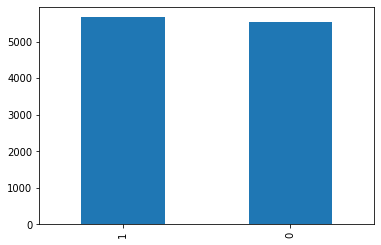

In [0]:
# train_data['label'].value_counts().plot(kind='bar')

train_data['up/down'].value_counts().plot(kind='bar')

In [0]:
# test_data['label'].value_counts().plot(kind='bar')

test_data['up/down'].value_counts().plot(kind='bar')


숫자로도 확인해봅니다. 1이 상승 0이 하락

In [0]:
# print(train_data.groupby('label').size().reset_index(name='count')) print(test_data.groupby('label').size().reset_index(name='count'))

print(train_data.groupby('up/down').size().reset_index(name='count')) 
print(test_data.groupby('up/down').size().reset_index(name='count'))


   up/down  count
0        0   5542
1        1   5663
   up/down  count
0        0    378
1        1    417


# 3. 모델을 만들기 위한 데이터 전처리 작업
먼저 각각의 제목을 토큰화 해주었습니다.

Okt형태소 분석기를 활용하였습니다.


In [0]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다', '[Hot-Line]', '[시장을 이겨라]', '[단독]']


In [0]:
pip install konlpy

In [0]:
import konlpy 
from konlpy.tag import Okt 
# from konlpy.tag import Kkma 
# kkma = Kkma() 
okt = Okt()
X_train = [] 
for sentence in train_data['headline']: 
  temp_X = [] 
  # temp_X = kkma.morphs(sentence, stem=True) # 토큰화 
  temp_X = kkma.morphs(sentence) # 토큰화 
  
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거 
  temp_X
  X_train.append(temp_X) 

X_test = [] 
  
for sentence in test_data['headline']: 
  temp_X = [] 
  # temp_X = kkma.morphs(sentence, stem=True) # 토큰화 
  temp_X = kkma.morphs(sentence) # 토큰화 
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거 
  X_test.append(temp_X)


In [0]:
# temp_X
X_train
# 트레인과 테스트 똑같이!


In [0]:
X_test

In [0]:
from keras.preprocessing.text import Tokenizer 

max_words = 5000 
# max_words = 35000 
tokenizer = Tokenizer(num_words = max_words) 
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train) 
X_test = tokenizer.texts_to_sequences(X_test)


In [0]:
print("제목의 최대 길이 : ", max(len(l) for l in X_train)) 
print("제목의 평균 길이 : ", sum(map(len, X_train))/ len(X_train)) 
plt.hist([len(s) for s in X_train], bins=50) 
plt.xlabel('length of Data') 
plt.ylabel('number of Data') 
plt.show()


In [0]:
print("제목의 최대 길이 : ", max(len(l) for l in X_test)) 
print("제목의 평균 길이 : ", sum(map(len, X_test))/ len(X_test)) 
plt.hist([len(s) for s in X_test], bins=50) 
plt.xlabel('length of Data') 
plt.ylabel('number of Data') 
plt.show()


다음으로는 y값으로 들어갈 label  0, 1을 컴퓨터가 보고 알수 있도록 one-hot encoding을 해주었습니다.

> 들여쓴 블록




In [0]:
import numpy as np 

y_train = [] 
y_test = [] 

for i in range(len(train_data['up/down'])): 
  if train_data['up/down'].iloc[i] == 1: 
    y_train.append([0, 1]) 
  elif train_data['up/down'].iloc[i] == 0: 
    y_train.append([1, 0]) 

    
for i in range(len(test_data['up/down'])): 
  if test_data['up/down'].iloc[i] == 1: 
    y_test.append([0, 1]) 
  elif test_data['up/down'].iloc[i] == 0: 
    y_test.append([1, 0]) 

y_train = np.array(y_train) 
y_test = np.array(y_test)


# 4. 모델 만들기

In [0]:
from keras.layers import Embedding, Dense, LSTM 
from keras.models import Sequential 
from keras.preprocessing.sequence import pad_sequences 

# max_len = 20 # 전체 데이터의 길이를 20로 맞춘다 
max_len = 20

X_train = pad_sequences(X_train, maxlen=max_len) 

X_test = pad_sequences(X_test, maxlen=max_len)

model = Sequential() 
model.add(Embedding(max_words, 100)) 
model.add(LSTM(128)) 
model.add(Dense(2, activation='softmax')) 

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) 

history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.1)


In [0]:
from keras.layers import Embedding, Dense, LSTM 
from keras.models import Sequential 
from keras.preprocessing.sequence import pad_sequences 

# max_len = 20 # 전체 데이터의 길이를 20로 맞춘다 
max_len = 20

X_train = pad_sequences(X_train, maxlen=max_len) 

X_test = pad_sequences(X_test, maxlen=max_len)

model = Sequential() 
model.add(Embedding(max_words, 100)) 
model.add(LSTM(128)) 
model.add(Dense(1, activation='sigmoid')) 

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) 

history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.1)


In [0]:
model.summary()


먼저 필요한 것들을 import 해주고 pad_sequences를 활용하여 모든 데이터의 길이를 20,40으로 통일하였습니다.




In [0]:
print("\n 테스트 정확도 : {:2f}%".format(model.evaluate(X_test, y_test)[1]*100))

In [0]:
from keras.layers import Embedding, Dense, LSTM 
from keras.models import Sequential 
from keras.preprocessing.sequence import pad_sequences 

max_len = 20 # 전체 데이터의 길이를 20로 맞춘다 

X_train = pad_sequences(X_train, maxlen=max_len) 
X_test = pad_sequences(X_test, maxlen=max_len)


In [0]:
model2 = Sequential() 
model2.add(Embedding(max_words, 100)) 
model2.add(LSTM(128)) 
model2.add(Dense(2, activation='softmax')) 

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

history = model2.fit(X_train, y_train, epochs=10, batch_size=100, validation_split=0.1)


In [0]:
print("\n 테스트 정확도 : {:2f}%".format(model.evaluate(X_test, y_test)[1]*100))

In [0]:
from keras.layers import Embedding, Dense, LSTM 
from keras.models import Sequential 
from keras.preprocessing.sequence import pad_sequences 

# max_len = 20 # 전체 데이터의 길이를 20로 맞춘다 
max_len = 20

X_train = pad_sequences(X_train, maxlen=max_len) 
X_test = pad_sequences(X_test, maxlen=max_len)
model3 = Sequential() 
model3.add(Embedding(max_words, 100)) 
model3.add(LSTM(128)) 
model3.add(Dense(2, activation='softmax')) 

model3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) 

history = model3.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.05)


Using TensorFlow backend.


NameError: ignored

In [0]:
print("\n 테스트 정확도 : {:2f}%".format(model3.evaluate(X_test, y_test)[1]*100))

In [0]:
from keras.layers import Embedding, Dense, LSTM 
from keras.models import Sequential 
from keras.preprocessing.sequence import pad_sequences 

# max_len = 20 # 전체 데이터의 길이를 20로 맞춘다 
max_len = 20

X_train = pad_sequences(X_train, maxlen=max_len) 
X_test = pad_sequences(X_test, maxlen=max_len)
model4 = Sequential() 
model4.add(Embedding(max_words, 100)) 
model4.add(LSTM(128)) 
model4.add(Dense(2, activation='softmax')) 

model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

history = model4.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.05)


In [0]:
print("\n 테스트 정확도 : {:2f}%".format(model4.evaluate(X_test, y_test)[1]*100))

In [0]:
from keras.layers import Embedding, Dense, LSTM 
from keras.models import Sequential 
from keras.preprocessing.sequence import pad_sequences 

# max_len = 20 # 전체 데이터의 길이를 20로 맞춘다 
max_len = 40

X_train = pad_sequences(X_train, maxlen=max_len) 
X_test = pad_sequences(X_test, maxlen=max_len)
model5 = Sequential() 
model5.add(Embedding(max_words, 100)) 
model5.add(LSTM(128)) 
model5.add(Dense(2, activation='softmax')) 
model5.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) 

history = model5.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.05)


In [0]:
print("\n 테스트 정확도 : {:2f}%".format(model5.evaluate(X_test, y_test)[1]*100))

In [0]:
from keras.layers import Embedding, Dense, LSTM 
from keras.models import Sequential 
from keras.preprocessing.sequence import pad_sequences 

# max_len = 20 # 전체 데이터의 길이를 20로 맞춘다 
max_len = 40

X_train = pad_sequences(X_train, maxlen=max_len) 
X_test = pad_sequences(X_test, maxlen=max_len)
model6 = Sequential() 
model6.add(Embedding(max_words, 100)) 
model6.add(LSTM(128)) 
model6.add(Dense(2, activation='softmax')) 
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

history = model6.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.05)


In [0]:
print("\n 테스트 정확도 : {:2f}%".format(model6.evaluate(X_test, y_test)[1]*100))

In [0]:
from keras.layers import Embedding, Dense, LSTM 
from keras.models import Sequential 
from keras.preprocessing.sequence import pad_sequences 

# max_len = 20 # 전체 데이터의 길이를 20로 맞춘다 
max_len = 40

X_train = pad_sequences(X_train, maxlen=max_len) 
X_test = pad_sequences(X_test, maxlen=max_len)
model6 = Sequential() 
model6.add(Embedding(max_words, 100)) 
model6.add(LSTM(128)) 
model6.add(Dense(2, activation='softmax')) 
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

history = model6.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.05)


상승, 하락 2가지로 분류해야하니 
LSTM, softmax, categorical_crossentropy를 사용하였습니다.

batch_size는 10084개의 훈련데이터 중 10퍼센트인 1008.4개는 validation_data로 활용하기위해 validation_split을 0.1을 부여하였습니다.

optimizer는 rmsprop을 사용하여 위와 같이 모델을 만들고 학습을 시켜보았습니다.


In [0]:
predict = model.predict(X_test)


In [0]:
import numpy as np 

predict_labels = np.argmax(predict, axis=1) 
original_labels = np.argmax(y_test, axis=1)


In [0]:
for i in range(100): 
  print("기사제목 : ", test_data['headline'].iloc[i], "/\t 실제 방향 : ", original_labels[i], "/\t예측 방향 : ", predict_labels[i])
